In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import feature_extraction, model_selection, preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

vocabulary_size = 10000


In [5]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [6]:
x_train = train_df["text"]
y_train = train_df["target"]

x_train[0]

'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all'

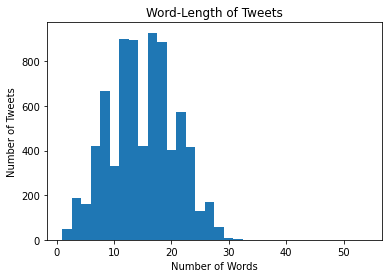

In [7]:
# working out word length of tweets

lengths = [len(t.split(' ')) for t in train_df["text"]]

plt.hist(lengths, bins=len(set(lengths)))
plt.xlabel('Number of Words')
plt.ylabel('Number of Tweets')
plt.title('Word-Length of Tweets')
plt.show()

# the chart shows that 30 is a reasonable sequence length

sequence_length = 30

In [8]:
# Tokenizing

from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=10000, oov_token='<UNK>')
tokenizer.fit_on_texts(x_train)
x_train_tokenized = tokenizer.texts_to_sequences(x_train)

x_train_tokenized[0]


[120, 4634, 25, 5, 869, 9, 22, 264, 139, 1620, 4635, 90, 41]

In [9]:
# Padding and Truncating

from tensorflow.keras import preprocessing

x_train_padded = preprocessing.sequence.pad_sequences(
    x_train_tokenized,
    maxlen=sequence_length,
    padding="post",
    truncating="post"
)


# Neural Networks with Embedding

In [10]:
# embeding includes both vectorization and todense that was done for previous models

from tensorflow.keras import models, layers

model = models.Sequential()

embedding_size = 16
model.add(layers.Embedding(vocabulary_size, embedding_size, input_length=sequence_length))

model.add(layers.Flatten())
model.add(layers.Dense(1, activation="sigmoid"))
model.summary()

model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

history = model.fit(
    x_train_padded, y_train,
    epochs=20,
    batch_size=500,
    validation_split=0.2
)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 30, 16)            160000    
_________________________________________________________________
flatten (Flatten)            (None, 480)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 481       
Total params: 160,481
Trainable params: 160,481
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
13/13 [==============================] - 1s 16ms/step - loss: 0.6868 - accuracy: 0.5803 - val_loss: 0.6848 - val_accuracy: 0.5391
Epoch 2/20
13/13 [==============================] - 0s 5ms/step - loss: 0.6676 - accuracy: 0.5984 - val_loss: 0.6790 - val_accuracy: 0.5358
Epoch 3/20
13/13 [==============================] - 0s 5ms/step - loss: 0.6495 - accuracy: 0.5984 -

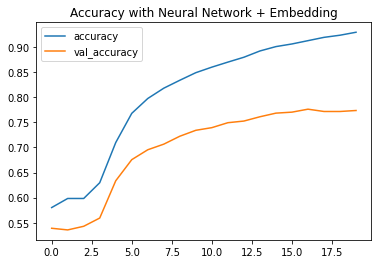

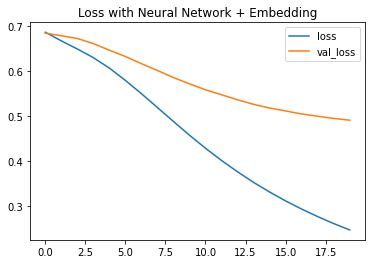

In [11]:
import matplotlib.pyplot as plt

plt.plot(model.history.history["accuracy"], label="accuracy")
plt.plot(model.history.history["val_accuracy"], label="val_accuracy")
plt.title("Accuracy with Neural Network + Embedding")
plt.legend()
plt.show()
plt.close()

plt.plot(model.history.history["loss"], label="loss")
plt.plot(model.history.history["val_loss"], label="val_loss")
plt.title("Loss with Neural Network + Embedding")
plt.legend()
plt.show()
plt.close()

# Neural Networks with Embedding & LSTM

In [12]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Embedding(vocabulary_size, embedding_size, input_length=sequence_length))
model.add(layers.LSTM(32, return_sequences=True))
model.add(layers.LSTM(32))
model.add(layers.Dense(1, activation="sigmoid"))
model.summary()

model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

history = model.fit(
    x_train_padded, y_train,
    epochs=20,
    batch_size=1000,
    validation_split=0.2
)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 30, 16)            160000    
_________________________________________________________________
lstm (LSTM)                  (None, 30, 32)            6272      
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 174,625
Trainable params: 174,625
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
7/7 [==============================] - 5s 262ms/step - loss: 0.6864 - accuracy: 0.5791 - val_loss: 0.6894 - val_accuracy: 0.5345
Epoch 2/20
7/7 [==============================] - 1s 153ms/step - loss: 0.6767 - accuracy: 0.5793 - val_lo

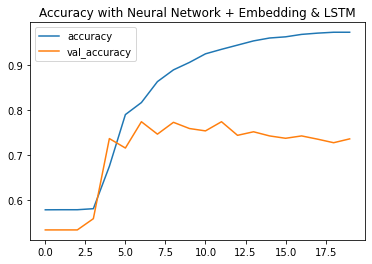

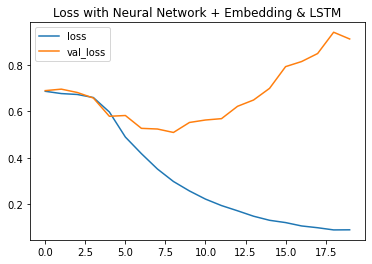

In [13]:
plt.plot(model.history.history["accuracy"], label="accuracy")
plt.plot(model.history.history["val_accuracy"], label="val_accuracy")
plt.title("Neural Network with Embedding & LSTM")
plt.title("Accuracy with Neural Network + Embedding & LSTM")
plt.legend()
plt.show()
plt.close()

plt.plot(model.history.history["loss"], label="loss")
plt.plot(model.history.history["val_loss"], label="val_loss")
plt.title("Loss with Neural Network + Embedding & LSTM")
plt.legend()
plt.show()
plt.close()